In [1]:
import pandas as pd
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
from pathlib import Path
from firebase_admin import firestore
import datetime
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
# Fetch the service account key JSON file contents
filename = './key/digital-education-9f0cb-firebase-adminsdk-8aajx-29dce305d5.json'
cred = credentials.Certificate(filename)
default_app = firebase_admin.initialize_app(cred)
db = firestore.client()

In [3]:
def load_df(name):
    col = list(db.collection(name).stream())
    col_dict = list(map(lambda x: x.to_dict(), col))
    df = pd.DataFrame(col_dict)
    return df

In [4]:
df_users = load_df('users')
df_users = df_users.rename(columns={'user':'uuid', 'timestamp':'time'})
df_users.head()

,language,age,uuid,time,username
0,EN,21,3ed6b9b5-b311-41b4-8fbe-84a9aa519389,1670176126980,Hugo
1,DE,16,30b1ee7d-8579-43fd-b2f4-32cf1edc06f1,1669627471062,Nastasija Ilic
2,EN,21,0ba2b00a-a6d5-4463-8dd2-becbd7cde5c5,1669672523005,Benoit
3,DE,17,8733b323-a5b5-402a-b384-aacdfe416a99,1669627539236,rilind kolgeci
4,DE,17,a847525c-3630-4958-8c68-d6713cf2516e,1669617222307,Jonathan


In [5]:
df_logs = load_df('logs')
df_logs = df_logs.rename(columns={'user':'uuid', 'timestamp':'time'})

df_logs.head()

,currentactivity,cause,timespent,part,uuid,time,nextactivity
0,12,screenChange,5.916,Instruction,72eba46b-62d9-428f-9b2e-b55fbe21185a,1669792922557,13
1,4,screenChange,25.999,Problem Solving,1b5ad272-4ecd-4e16-9cb8-5441834b9007,1669627637582,5
2,33,screenChange,0.599,Instruction,8c7a33db-db12-4bde-8ce8-0c78b16de28a,1669627769196,34
3,8,screenChange,7.648,Instruction,ac411dc7-0f52-4f13-bf76-4ecc9fa65b8f,1669617349508,9
4,19,screenChange,0.990,Instruction,8c7a33db-db12-4bde-8ce8-0c78b16de28a,1669627758142,20


In [6]:
df_boards = load_df('boards')
df_boards.head()

,height,uuid,time,id,width,part,slide,gridString
0,1,5628a823-d370-411f-8505-695540b77248,1669618276005,0,4,ps,15,1000
1,1,3d849071-9e84-466b-bf84-ed8af8ff0173,1669794825502,1,4,ps,15,1100
2,1,365cbf6d-2340-4c5f-9c28-dc1f5b5d6cf3,1669617940051,2,9,ps,10,000000010
3,1,8c7a33db-db12-4bde-8ce8-0c78b16de28a,1669627812700,0,9,ps,11,001000000
4,1,a847525c-3630-4958-8c68-d6713cf2516e,1669618382009,1,4,ps,14,0000


In [7]:
df_feedback = load_df('feedbacks')
df_feedback.head()

,part,message,uuid,time,slide
0,ps,I used binary to encode the letters and number...,a8cc1841-8945-447b-9ad6-55a1f8373f35,1669628750177,12
1,ps,Ich denke meinen Weg würde vielecht nicht alle...,787e061e-220c-469e-9701-160975ede767,1669618357304,12
2,assessment,148,1b5ad272-4ecd-4e16-9cb8-5441834b9007,1669628529854,6
3,ps,"Da ich weiss, dass sich die ""Zahlen"" im Binärs...",7fba615f-5ec1-4bb6-a8c8-889e9fce9531,1669627897792,5
4,assessment,Dann würden Dezimalzahlen dazukommen (1 = halb...,7fba615f-5ec1-4bb6-a8c8-889e9fce9531,1669629107120,4


In [8]:
df_logs.groupby('uuid').head()

,currentactivity,cause,timespent,part,uuid,time,nextactivity
0,12,screenChange,5.916,Instruction,72eba46b-62d9-428f-9b2e-b55fbe21185a,1669792922557,13
1,4,screenChange,25.999,Problem Solving,1b5ad272-4ecd-4e16-9cb8-5441834b9007,1669627637582,5
2,33,screenChange,0.599,Instruction,8c7a33db-db12-4bde-8ce8-0c78b16de28a,1669627769196,34
3,8,screenChange,7.648,Instruction,ac411dc7-0f52-4f13-bf76-4ecc9fa65b8f,1669617349508,9
4,19,screenChange,0.990,Instruction,8c7a33db-db12-4bde-8ce8-0c78b16de28a,1669627758142,20
...,...,...,...,...,...,...,...
1960,2,screenChange,1.305,Problem Solving,ae8e057b-cc9f-41f7-9421-908ca7fff888,1669583946723,3
2189,3,screenChange,1.314,Problem Solving,bc925034-0617-45e8-b2d7-1a52ad1e1a9a,1669594733641,4
2328,2,screenChange,1.079,Problem Solving,3dc078a3-3ff8-4573-8f00-012e0af26351,1669615098787,3
2366,0,screenChange,NaN,Problem Solving,3dc078a3-3ff8-4573-8f00-012e0af26351,1669615096269,1


In [9]:
def convert_timestamp(x):
    if not np.isnan(x):
        return datetime.datetime.fromtimestamp(x/1000)
    else:
        return x

In [10]:
def query_user(uuid):
    user_data = df_users[df_users.uuid == uuid]


    user_logs = df_logs[df_logs.uuid == uuid]
    user_feedbacks = df_feedback[df_feedback.uuid == uuid]
    user_boards = df_boards[df_boards.uuid == uuid]
    user_history = pd.concat([user_logs, user_feedbacks, user_boards],sort=False).sort_values('time')
    user_history['time'] = user_history['time'].apply(lambda x: convert_timestamp(x))
    user_history = user_history.set_index('time')

    return user_data, user_history

In [11]:
## ENTER USERNAME YOU WISH TO QUERY HERE

def save_history(uuid):
    user_data, hist = query_user(uuid)
    username = user_data.username.iloc[0]
    username = "".join(x for x in username if x.isalnum())
    registered_at = convert_timestamp(user_data.time.iloc[0])
    language = user_data.language.iloc[0]
    age = user_data.age.iloc[0]


    print(f'querying data for user {username}, uuid: {uuid}, age {age}, language: {language}, registered at {registered_at}')

    
    path = './data/'
    if(registered_at.day == 28):
        if(6 < registered_at.hour < 9):
            path += 'grp1/'
        if(9 < registered_at.hour < 11):
            path += 'grp2/'

    hist.to_csv(f'{path}{username}-{age}-{language}-{uuid}.csv')

In [12]:
df_users['uuid'].apply(save_history)

querying data for user Hugo, uuid: 3ed6b9b5-b311-41b4-8fbe-84a9aa519389, age 21, language: EN, registered at 2022-12-04 18:48:46.980000
querying data for user NastasijaIlic, uuid: 30b1ee7d-8579-43fd-b2f4-32cf1edc06f1, age 16, language: DE, registered at 2022-11-28 10:24:31.062000
querying data for user Benoit, uuid: 0ba2b00a-a6d5-4463-8dd2-becbd7cde5c5, age 21, language: EN, registered at 2022-11-28 22:55:23.005000
querying data for user rilindkolgeci, uuid: 8733b323-a5b5-402a-b384-aacdfe416a99, age 17, language: DE, registered at 2022-11-28 10:25:39.236000
querying data for user Jonathan, uuid: a847525c-3630-4958-8c68-d6713cf2516e, age 17, language: DE, registered at 2022-11-28 07:33:42.307000
querying data for user Mason, uuid: a511ac42-e6e0-4fba-b067-19dbec25de9a, age 16, language: DE, registered at 2022-11-28 07:33:06.688000
querying data for user olivier, uuid: 065980fc-c870-410d-9468-67208a8a44db, age 55, language: EN, registered at 2022-11-29 12:11:09.665000
querying data for us

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
Name: uuid, dtype: object

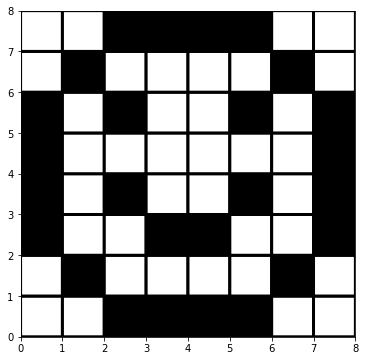

In [13]:
smiley = [False, False, True, True, True, True, False, False,
                             False, True, False, False, False, False, True, False,
                             True, False, True, False, False, True, False, True,
                             True, False, False, False, False, False, False, True,
                             True, False, True, False, False, True, False, True,
                             True, False, False, True, True, False, False, True,
                             False, True, False, False, False, False, True, False,
                             False, False, True, True, True, True, False, False]

# test = "01111110101010101010101011111011101101110111110101010101011111110111110110000111011111011"

def create_answer_puzzle(binary_seq):
    ans = np.zeros((8,8))
    for i in range(8):
        for j in range(8):
            ans[i][j] = binary_seq[i * 8 + j]
    cmap = colors.ListedColormap(['white','black'])
    plt.figure(figsize=(6,6))
    plt.pcolor(ans[::-1],cmap=cmap,edgecolors='k', linewidths=3)
    plt.show()
        

create_answer_puzzle(smiley)
        